[*********************100%%**********************]  1 of 1 completed


                  High         Low       Close    upper_bb   middle_bb  \
Date                                                                     
2020-01-02   59.610252   55.971836   59.460728         NaN         NaN   
2020-01-03   59.809620   57.467075   59.660095         NaN         NaN   
2020-01-06   60.856285   59.012157   60.507397         NaN         NaN   
2020-01-07   61.005810   59.410889   60.058826         NaN         NaN   
2020-01-08   60.058826   59.161682   59.510571         NaN         NaN   
...                ...         ...         ...         ...         ...   
2024-04-05  156.470001  148.529999  156.300003  147.746070  139.221962   
2024-04-08  157.949997  153.699997  156.520004  150.441780  140.345647   
2024-04-09  157.869995  150.929993  154.490005  152.210588  141.423699   
2024-04-10  157.789993  151.649994  156.610001  154.121048  142.571837   
2024-04-11  158.440002  154.750000  157.679993  156.000779  143.665733   

              lower_bb  
Date        

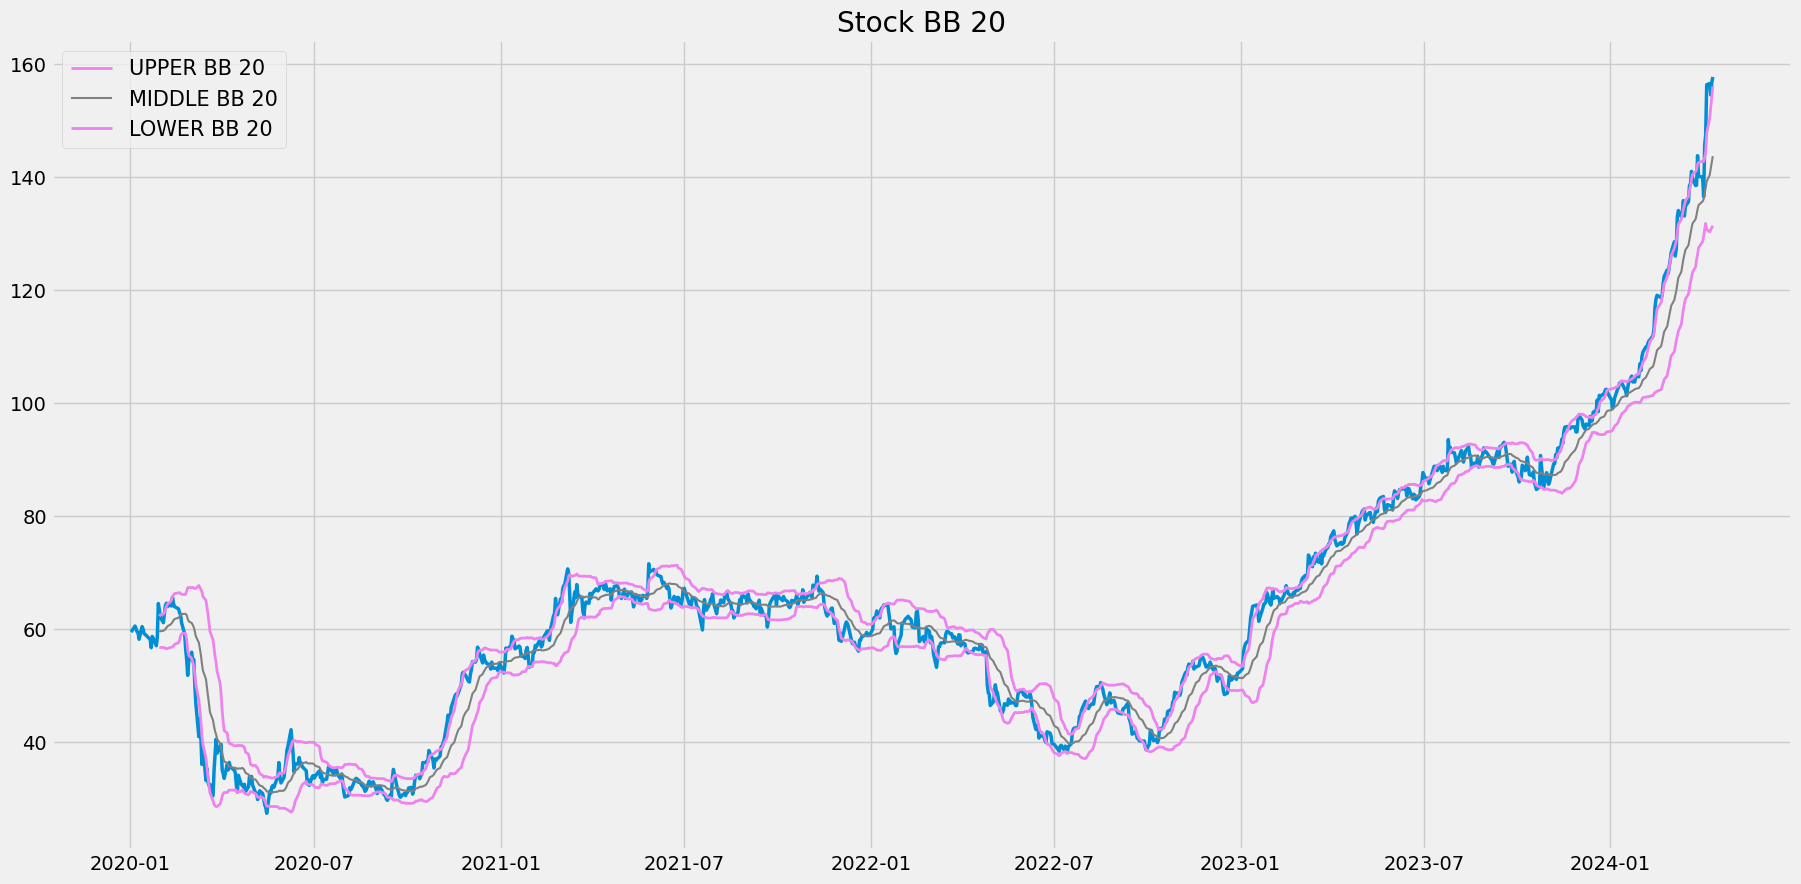

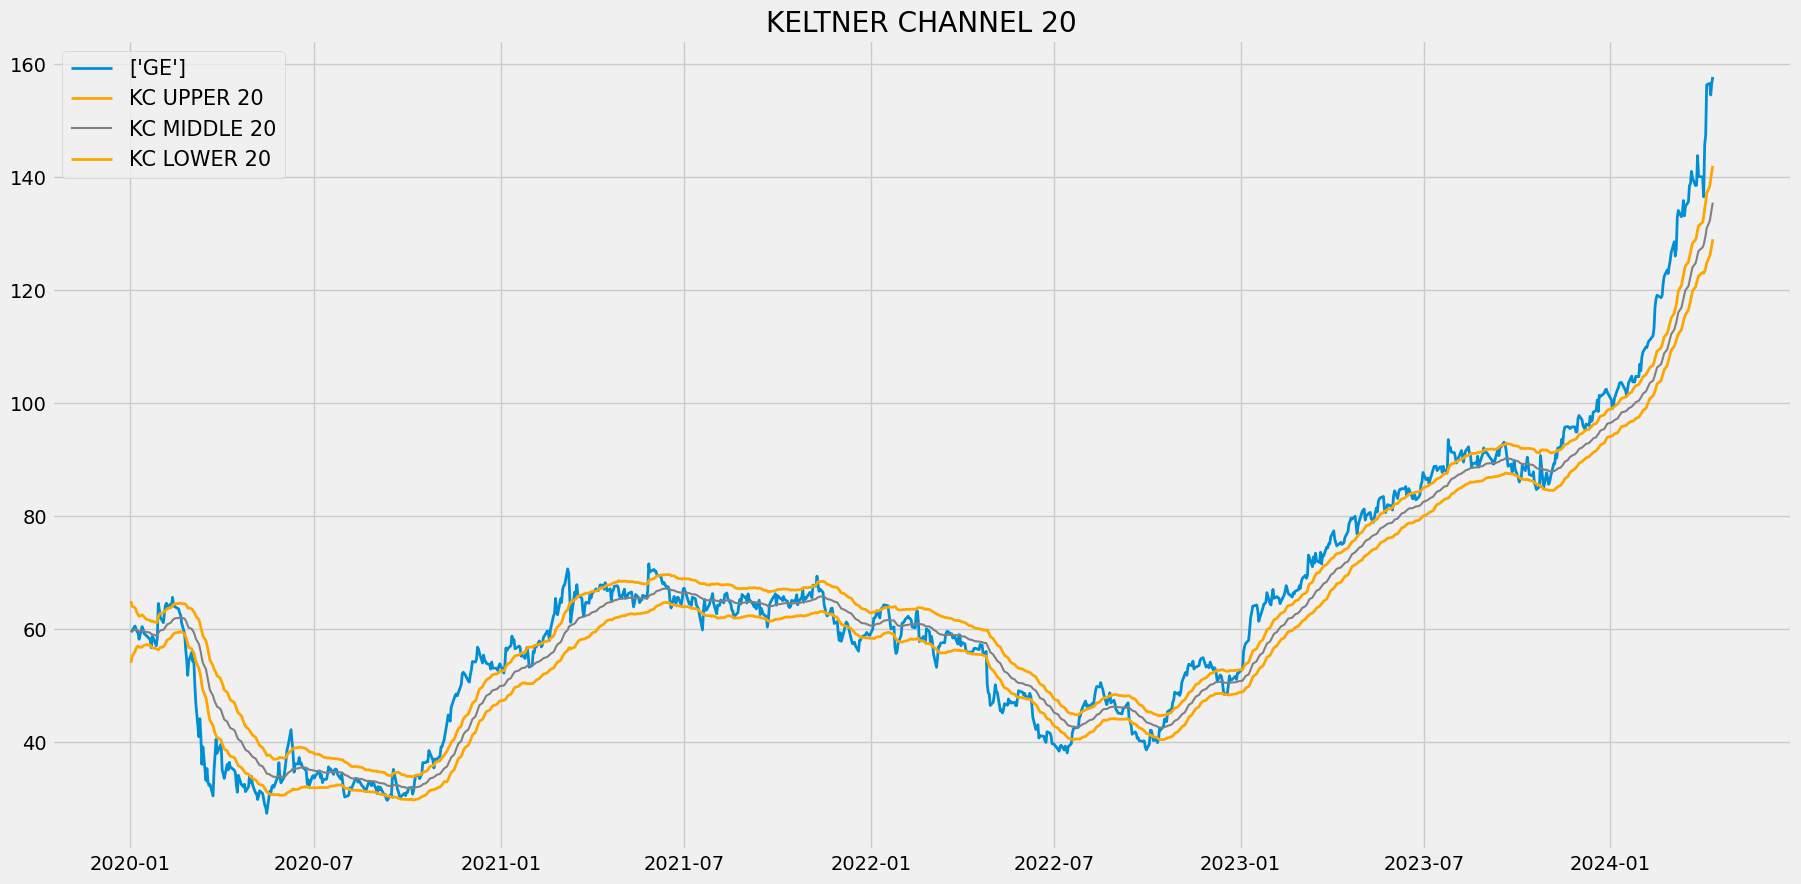

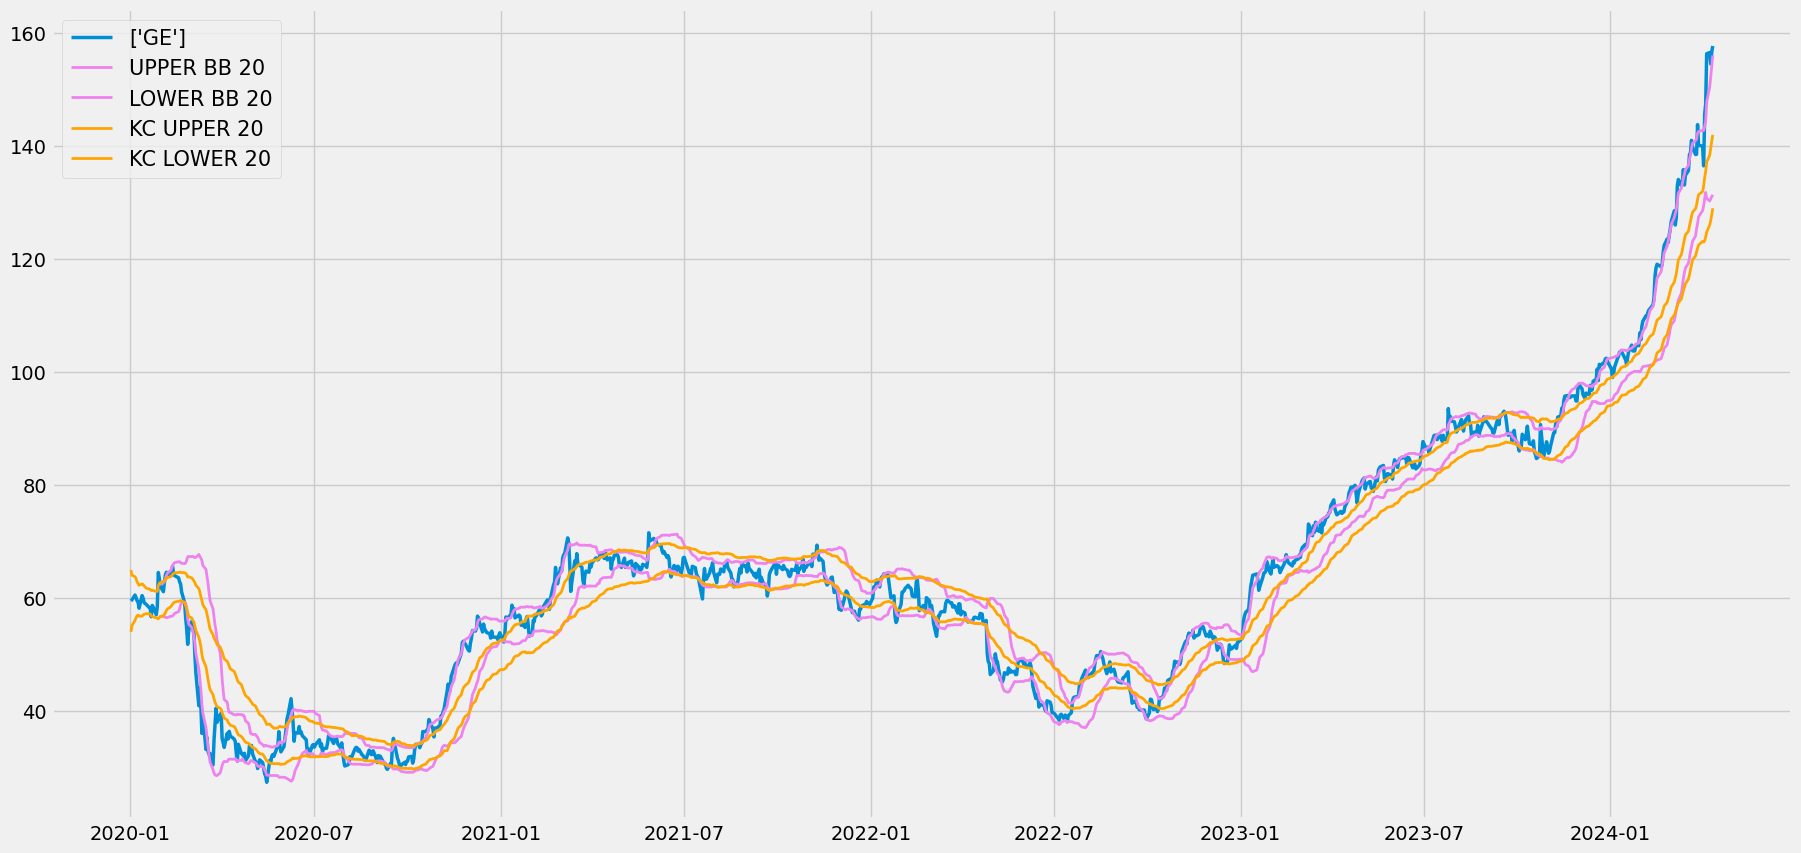

C:\Users\cdecinti\AppData\Local\Temp\ipykernel_1064\1473483476.py:108: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if ret[i] < 0:
C:\Users\cdecinti\AppData\Local\Temp\ipykernel_1064\1473483476.py:112: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  up.append(ret[i])
C:\Users\cdecinti\AppData\Local\Temp\ipykernel_1064\1473483476.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  down.append(ret[i])


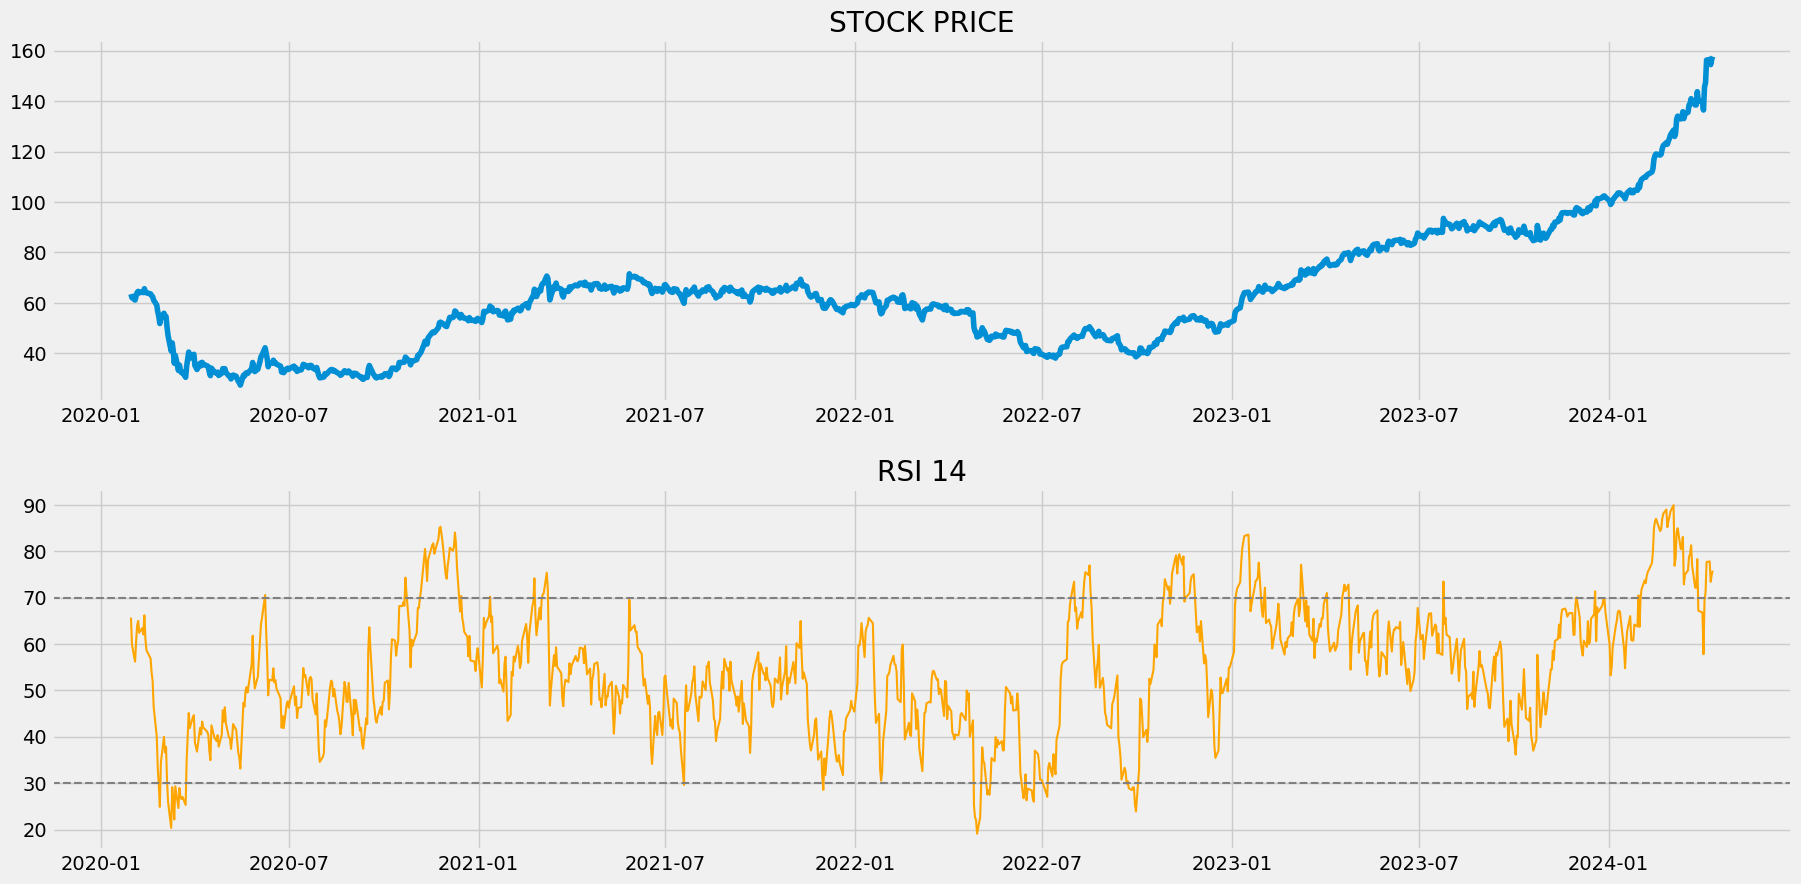

C:\Users\cdecinti\AppData\Local\Temp\ipykernel_1064\1473483476.py:149: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if lower_bb[i] < kc_lower[i] and upper_bb[i] > kc_upper[i] and rsi[i] < 30:
C:\Users\cdecinti\AppData\Local\Temp\ipykernel_1064\1473483476.py:159: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif lower_bb[i] < kc_lower[i] and upper_bb[i] > kc_upper[i] and rsi[i] > 70:
C:\Users\cdecinti\AppData\Local\Temp\ipykernel_1064\1473483476.py:151: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataF

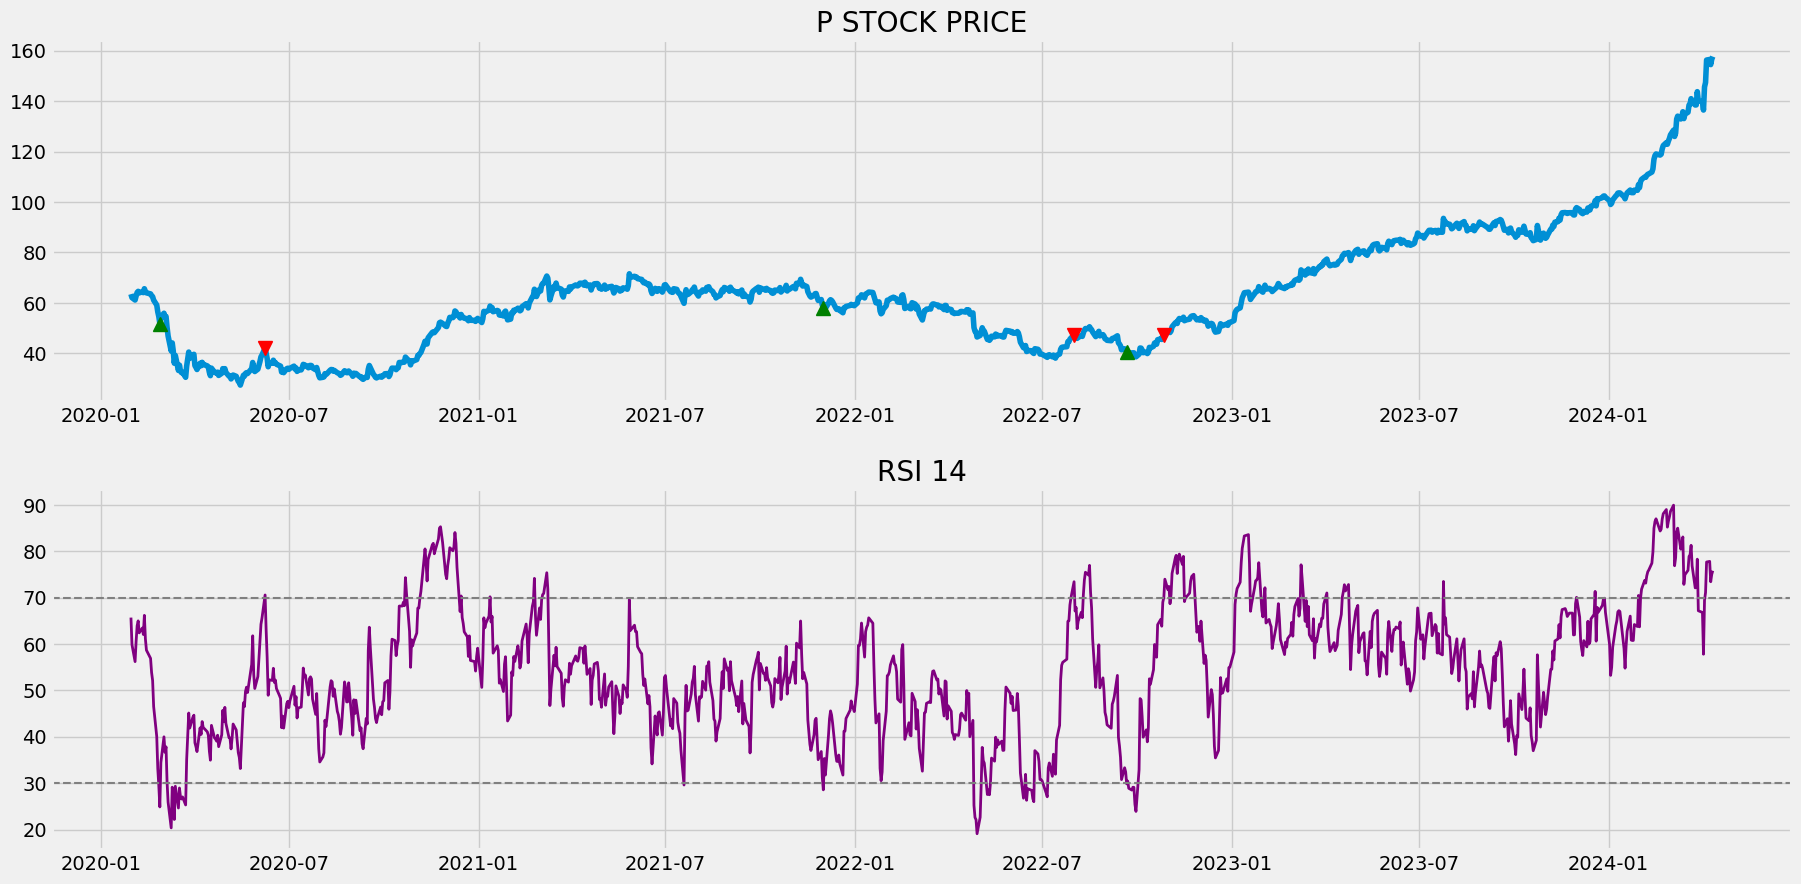

C:\Users\cdecinti\AppData\Local\Temp\ipykernel_1064\1473483476.py:230: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  returns = P_ret['returns'][i]*strategy['bb_kc_rsi_position'][i]
C:\Users\cdecinti\AppData\Local\Temp\ipykernel_1064\1473483476.py:235: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  number_of_stocks = floor(investment_value/P['Close'][0])
[*********************100%%**********************]  1 of 1 completed

Profit gained from the BB KC RSI strategy by investing $100k in :-39844.47
Profit percentage of the BB KC RSI strategy : -40%
Benchmark profit by investing $100k : 59290.91
Benchmark Profit percentage : 59%
BB KC RSI Strategy profit is -99% higher than the Benchmark Profit



C:\Users\cdecinti\AppData\Local\Temp\ipykernel_1064\1473483476.py:256: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  number_of_stocks = floor(investment_value/spy[0])


In [107]:
# IMPORTING PACKAGES
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from math import floor
from termcolor import colored as cl
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20,10)
#Assets ticker
ticker = ["TSLA"]
ticker.sort()

#Data Range
start = '2020-01-01'
end = '2024-04-12'

P = yf.download(ticker, start = start, end = end)
P = P.loc[:,('High','Low','Close')]
P = pd.DataFrame(P)
Y = P.pct_change().dropna()

# IMPORT FILE EXCEL META A 5 MINUTI
# file_path = "C:\\Users\\cdecinti\\desktop\\Doc Utili\\Personale\\Codici\\R Studio\\Dati_Intraday\\META_5MIN_rev.xlsx"

# db = pd.read_excel(file_path)
# print(db)

# P = pd.DataFrame(db[['timestamp','high','low','close']]).set_index('timestamp')
# P.index = pd.to_datetime(P.index)
# P = P.iloc[::-1]
# print(P.head())

# BOLLINGER BANDS CALCULATION

def sma(data, lookback):
	sma = data.rolling(lookback).mean()
	return sma
	
def get_bb(data, lookback):
	std = data.rolling(lookback).std()
	upper_bb = sma(data, lookback) + std * 1.5
	lower_bb = sma(data, lookback) - std * 1.5
	middle_bb = sma(data, lookback)
	return upper_bb, middle_bb, lower_bb
	
P['upper_bb'], P['middle_bb'], P['lower_bb'] = get_bb(P['Close'], 20)
print(P)

# BOLLINGER BANDS PLOT
plot_data = P[P.index >= '2020-01-01']

plt.plot(plot_data['Close'], linewidth = 2.5)
plt.plot(plot_data['upper_bb'], label = 'UPPER BB 20', linewidth = 2, color = 'violet')
plt.plot(plot_data['middle_bb'], label = 'MIDDLE BB 20', linewidth = 1.5, color = 'grey')
plt.plot(plot_data['lower_bb'], label = 'LOWER BB 20', linewidth = 2, color = 'violet')
plt.title('Stock BB 20')
plt.legend(fontsize = 15)
plt.show()
# KELTNER CHANNEL CALCULATION

def get_kc(high, low, close, kc_lookback, multiplier, atr_lookback):
	tr1 = pd.DataFrame(high - low)
	tr2 = pd.DataFrame(abs(high - close.shift()))
	tr3 = pd.DataFrame(abs(low - close.shift()))
	frames = [tr1, tr2, tr3]
	tr = pd.concat(frames, axis = 1, join = 'inner').max(axis = 1)
	atr = tr.ewm(alpha = 1/atr_lookback).mean()
	
	kc_middle = close.ewm(kc_lookback).mean()
	kc_upper = close.ewm(kc_lookback).mean() + multiplier * atr
	kc_lower = close.ewm(kc_lookback).mean() - multiplier * atr
	
	return kc_middle, kc_upper, kc_lower
	
P['kc_middle'], P['kc_upper'], P['kc_lower'] = get_kc(P['High'], P['Low'], P['Close'], 20, 1.5, 20)
P.tail()

# KELTNER CHANNEL PLOT
plot_data = P[P.index >= '2020-01-01']

plt.plot(plot_data['Close'], linewidth = 2, label = ticker)
plt.plot(plot_data['kc_upper'], linewidth = 2, color = 'orange', label = 'KC UPPER 20')
plt.plot(plot_data['kc_middle'], linewidth = 1.5, color = 'grey', label = 'KC MIDDLE 20')
plt.plot(plot_data['kc_lower'], linewidth = 2, color = 'orange', label = 'KC LOWER 20')
plt.legend(fontsize = 15)
plt.title('KELTNER CHANNEL 20')
plt.show()

plot_data = P[P.index >= '2020-01-01']

plt.plot(plot_data['Close'], linewidth = 2.5, label = ticker)
plt.plot(plot_data['upper_bb'], label = 'UPPER BB 20', linewidth = 2, color = 'violet')
plt.plot(plot_data['lower_bb'], label = 'LOWER BB 20', linewidth = 2, color = 'violet')
plt.plot(plot_data['kc_upper'], linewidth = 2, color = 'orange', label = 'KC UPPER 20')
plt.plot(plot_data['kc_lower'], linewidth = 2, color = 'orange', label = 'KC LOWER 20')
plt.legend(fontsize = 15)
plt.show()


# RSI CALCULATION

def get_rsi(close, lookback):
	ret = close.diff()
	up = []
	down = []
	for i in range(len(ret)):
		if ret[i] < 0:
			up.append(0)
			down.append(ret[i])
		else:
			up.append(ret[i])
			down.append(0)
	up_series = pd.Series(up)
	down_series = pd.Series(down).abs()
	up_ewm = up_series.ewm(com = lookback - 1, adjust = False).mean()
	down_ewm = down_series.ewm(com = lookback - 1, adjust = False).mean()
	rs = up_ewm/down_ewm
	rsi = 100 - (100 / (1 + rs))
	rsi_df = pd.DataFrame(rsi).rename(columns = {0:'rsi'}).set_index(close.index)
	rsi_df = rsi_df.dropna()
	return rsi_df[3:]
	
P['rsi_14'] = get_rsi(P['Close'], 14)
P = P.dropna()
P.tail()

# RSI PLOT

ax1 = plt.subplot2grid((11,1), (0,0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((11,1), (6,0), rowspan = 5, colspan = 1)
ax1.plot(P['Close'])
ax1.set_title('STOCK PRICE')
ax2.plot(P['rsi_14'], color = 'orange', linewidth = 1.5)
ax2.axhline(30, color = 'grey', linestyle = '--', linewidth = 1.5)
ax2.axhline(70, color = 'grey', linestyle = '--', linewidth = 1.5)
ax2.set_title('RSI 14')
plt.show()


# TRADING STRATEGY

def bb_kc_rsi_strategy(prices, upper_bb, lower_bb, kc_upper, kc_lower, rsi):
	buy_price = []
	sell_price = []
	bb_kc_rsi_signal = []
	signal = 0
	for i in range(len(prices)):
		if lower_bb[i] < kc_lower[i] and upper_bb[i] > kc_upper[i] and rsi[i] < 30:
			if signal != 1:
				buy_price.append(prices[i])
				sell_price.append(np.nan)
				signal = 1
				bb_kc_rsi_signal.append(signal)
			else:
				buy_price.append(np.nan)
				sell_price.append(np.nan)
				bb_kc_rsi_signal.append(0)
		elif lower_bb[i] < kc_lower[i] and upper_bb[i] > kc_upper[i] and rsi[i] > 70:
			if signal != -1:
				buy_price.append(np.nan)
				sell_price.append(prices[i])
				signal = -1
				bb_kc_rsi_signal.append(signal)
			else:
				buy_price.append(np.nan)
				sell_price.append(np.nan)
				bb_kc_rsi_signal.append(0)
		else:
			buy_price.append(np.nan)
			sell_price.append(np.nan)
			bb_kc_rsi_signal.append(0)
		
	return buy_price, sell_price, bb_kc_rsi_signal
	
buy_price, sell_price, bb_kc_rsi_signal = bb_kc_rsi_strategy(P['Close'], P['upper_bb'], P['lower_bb'],
															P['kc_upper'], P['kc_lower'], P['rsi_14'])
															

ax1 = plt.subplot2grid((11,1), (0,0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((11,1), (6,0), rowspan = 5, colspan = 1)
ax1.plot(P['Close'])
ax1.plot(P.index, buy_price, marker = '^', markersize = 10, linewidth = 0, color = 'green', label = 'BUY SIGNAL')
ax1.plot(P.index, sell_price, marker = 'v', markersize = 10, linewidth = 0, color = 'r', label = 'SELL SIGNAL')
ax1.set_title('P STOCK PRICE')
ax2.plot(P['rsi_14'], color = 'purple', linewidth = 2)
ax2.axhline(30, color = 'grey', linestyle = '--', linewidth = 1.5)
ax2.axhline(70, color = 'grey', linestyle = '--', linewidth = 1.5)
ax2.set_title('RSI 14')
plt.show()


# POSITION

position = []
for i in range(len(bb_kc_rsi_signal)):
	if bb_kc_rsi_signal[i] > 1:
		position.append(0)
	else:
		position.append(1)
for i in range(len(P['Close'])):
	if bb_kc_rsi_signal[i] == 1:
		position[i] = 1
	elif bb_kc_rsi_signal[i] == -1:
		position[i] = 0
	else:
		position[i] = position[i-1]
		
kc_upper = P['kc_upper']
kc_lower = P['kc_lower']
upper_bb = P['upper_bb']
lower_bb = P['lower_bb']
rsi = P['rsi_14']
close_price = P['Close']
bb_kc_rsi_signal = pd.DataFrame(bb_kc_rsi_signal).rename(columns = {0:'bb_kc_rsi_signal'}).set_index(P.index)
position = pd.DataFrame(position).rename(columns = {0:'bb_kc_rsi_position'}).set_index(P.index)

frames = [close_price, kc_upper, kc_lower, upper_bb, lower_bb, rsi, bb_kc_rsi_signal, position]
strategy = pd.concat(frames, join = 'inner', axis = 1)

strategy.tail()


# BACKTESTING

P_ret = pd.DataFrame(np.diff(P['Close'])).rename(columns = {0:'returns'})
bb_kc_rsi_strategy_ret = []

for i in range(len(P_ret)):
	returns = P_ret['returns'][i]*strategy['bb_kc_rsi_position'][i]
	bb_kc_rsi_strategy_ret.append(returns)

bb_kc_rsi_strategy_ret_df = pd.DataFrame(bb_kc_rsi_strategy_ret).rename(columns = {0:'bb_kc_rsi_returns'})
investment_value = 100000
number_of_stocks = floor(investment_value/P['Close'][0])
bb_kc_rsi_investment_ret = []

for i in range(len(bb_kc_rsi_strategy_ret_df['bb_kc_rsi_returns'])):
	returns = number_of_stocks*bb_kc_rsi_strategy_ret_df['bb_kc_rsi_returns'][i]
	bb_kc_rsi_investment_ret.append(returns)

bb_kc_rsi_investment_ret_df = pd.DataFrame(bb_kc_rsi_investment_ret).rename(columns = {0:'investment_returns'})
total_investment_ret = round(sum(bb_kc_rsi_investment_ret_df['investment_returns']), 2)
profit_percentage = floor((total_investment_ret/investment_value)*100)
print(cl('Profit gained from the BB KC RSI strategy by investing $100k in :{}'.format(total_investment_ret)))
print(cl('Profit percentage of the BB KC RSI strategy : {}%'.format(profit_percentage), attrs = ['bold']))


# SPY ETF COMPARISON

def get_benchmark(start_date, investment_value):
	spy = yf.download('SPY', start = start, end = end)['Close']
	benchmark = pd.DataFrame(np.diff(spy)).rename(columns = {0:'benchmark_returns'})

	investment_value = investment_value
	number_of_stocks = floor(investment_value/spy[0])
	benchmark_investment_ret = []

	for i in range(len(benchmark['benchmark_returns'])):
		returns = number_of_stocks*benchmark['benchmark_returns'][i]
		benchmark_investment_ret.append(returns)

	benchmark_investment_ret_df = pd.DataFrame(benchmark_investment_ret).rename(columns = {0:'investment_returns'})
	return benchmark_investment_ret_df

benchmark = get_benchmark('2010-01-01', 100000)
investment_value = 100000
total_benchmark_investment_ret = round(sum(benchmark['investment_returns']), 2)
benchmark_profit_percentage = floor((total_benchmark_investment_ret/investment_value)*100)
print(cl('Benchmark profit by investing $100k : {}'.format(total_benchmark_investment_ret), attrs = ['bold']))
print(cl('Benchmark Profit percentage : {}%'.format(benchmark_profit_percentage), attrs = ['bold']))
print(cl('BB KC RSI Strategy profit is {}% higher than the Benchmark Profit'.format(profit_percentage - benchmark_profit_percentage)))